# Config

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://www.kaggle.com/competitions/predict-energy-behavior-of-prosumers/discussion/455833

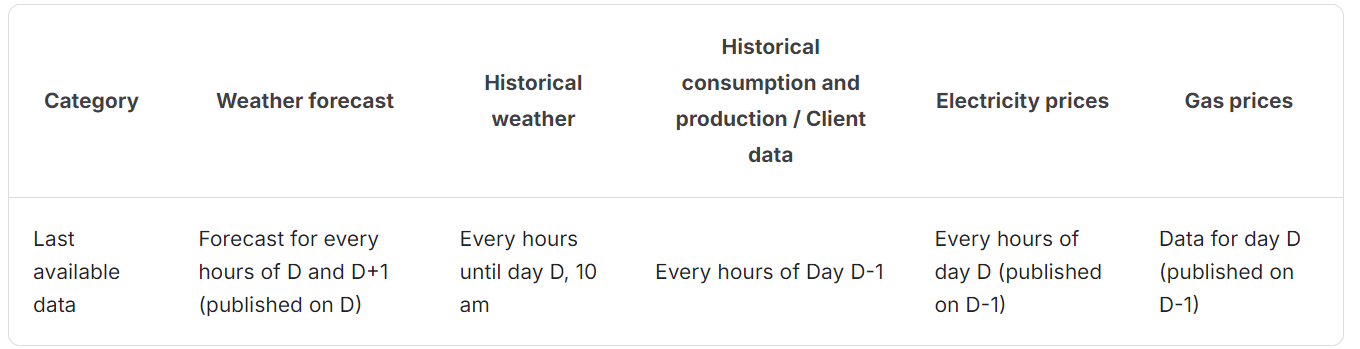

# Read Datasets

In [3]:
# Import root module

current_dir = os.getcwd() # Obtener la ruta del directorio actual del notebook
ROOT_PATH = os.path.dirname(current_dir) # Obtener la ruta del directorio superior
sys.path.insert(1, ROOT_PATH) # Insertar la ruta en sys.path

import root 

In [4]:
#creating paths from root 

client_path = root.DIR_DATA_RAW + 'client.csv'
electricity_prices_path = root.DIR_DATA_RAW + 'electricity_prices.csv'
gas_prices_path = root.DIR_DATA_RAW + 'gas_prices.csv'
historical_weather_path = root.DIR_DATA_RAW + 'historical_weather.csv'
forecast_weather_path = root.DIR_DATA_RAW + 'forecast_weather.csv'
train_path = root.DIR_DATA_RAW + 'train.csv'

In [5]:
# Read datasets from local
client = pd.read_csv(client_path)
electricity_prices = pd.read_csv(electricity_prices_path)
gas_prices = pd.read_csv(gas_prices_path)
historical_weather = pd.read_csv(historical_weather_path)
forecast_weather = pd.read_csv(forecast_weather_path)
train = pd.read_csv(train_path)

In [40]:
# Read datasets from google drive
#client = pd.read_csv('/content/drive/MyDrive/EAFIT/2 - Semestre/Integrador/datasets/train/client.csv')
#electricity_prices = pd.read_csv('/content/drive/MyDrive/EAFIT/2 - Semestre/Integrador/datasets/train/electricity_prices.csv')
#gas_prices = pd.read_csv('/content/drive/MyDrive/EAFIT/2 - Semestre/Integrador/datasets/train/gas_prices.csv')
#historical_weather = pd.read_csv('/content/drive/MyDrive/EAFIT/2 - Semestre/Integrador/datasets/train/historical_weather.csv')
#forecast_weather = pd.read_csv('/content/drive/MyDrive/EAFIT/2 - Semestre/Integrador/datasets/train/forecast_weather.csv')
#train = pd.read_csv('/content/drive/MyDrive/EAFIT/2 - Semestre/Integrador/datasets/train/train.csv')

In [6]:
print(client.shape)
client.head()

(41919, 7)


,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2


In [7]:
print(electricity_prices.shape)
electricity_prices.head()

(15286, 4)


,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [8]:
print(gas_prices.shape)
gas_prices.head()

(637, 5)


,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


In [9]:
print(historical_weather.shape)
historical_weather.head()

(1710802, 18)


,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0
1,2021-09-01 00:00:00,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,5.111111,359,0.0,0.0,0.0,57.6,22.2,1.0
2,2021-09-01 00:00:00,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,6.333333,355,0.0,0.0,0.0,57.6,22.7,1.0
3,2021-09-01 00:00:00,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0
4,2021-09-01 00:00:00,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,8.416667,5,0.0,0.0,0.0,57.6,23.7,1.0


In [10]:
print(forecast_weather.shape)
forecast_weather.head()

(3424512, 18)


,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-09-01 02:00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2021-09-01 02:00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2021-09-01 02:00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2021-09-01 02:00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2021-09-01 02:00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0


In [11]:
print(train.shape)
train.head()

(2018352, 9)


,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


# Rename dataset columns

In [12]:
def rename_df(df, df_name, exclude=None):
    if exclude is None:
        for col in df.columns:
            new_name = df_name + "__" + col
            df.rename(columns={col: new_name}, inplace = True)
    else:
        for col in df.columns:
            if col not in exclude:
                new_name = df_name + "__" + col
                df.rename(columns={col: new_name}, inplace = True)

In [13]:
# Change date column name
electricity_prices.rename(columns={'forecast_date': 'date'}, inplace = True)
gas_prices.rename(columns={'forecast_date': 'date'}, inplace = True)
historical_weather.rename(columns={'datetime': 'date'}, inplace = True)
forecast_weather.rename(columns={'forecast_datetime': 'date'}, inplace = True)
train.rename(columns={'datetime': 'date'}, inplace = True)

In [14]:
# Arrays of datasets and names
dfs = [client, electricity_prices, gas_prices, historical_weather, forecast_weather, train]
dfs_names = ["client", "electricity", "gas", "historical", "forecast", "train"]

In [15]:
# Rename columns. Format = datasetName_colName
for i in range(len(dfs)):
    rename_df(dfs[i], dfs_names[i], exclude=['date'])

# Group dataset rows by day

In [16]:
# Change dates to YYYY-MM-DD format
date_cols = ['date', 'electricity__origin_date', 'gas__origin_date', 'forecast__origin_datetime']
for df in dfs:
    for col in df.columns:
        if col in date_cols:
            df[col] = pd.to_datetime(df[col])
            df[col] = df[col].dt.date

In [17]:
# Group datasets by day
for i in range(len(dfs)):
    numeric_cols = dfs[i].select_dtypes(include=['number']).columns
    object_cols = dfs[i].select_dtypes(include=['object']).columns

    dfs[i] = dfs[i].groupby(['date']).agg({
        **{col: 'mean' for col in numeric_cols},
        **{col: lambda x: x.mode().iloc[0] if not x.mode().empty else None for col in object_cols}
    })
    dfs[i].reset_index(drop=True, inplace=True)

In [18]:
client
# dfs = [client, electricity_prices, gas_prices, historical_weather, forecast_weather, train]

,client__product_type,client__county,client__eic_count,client__installed_capacity,client__is_business,date,client__data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2
...,...,...,...,...,...,...,...
41914,1,15,51,415.60,0,2023-05-29,637
41915,3,15,161,2035.75,0,2023-05-29,637
41916,0,15,15,620.00,1,2023-05-29,637
41917,1,15,20,624.50,1,2023-05-29,637


# Create new dataframe for time series

In [19]:
def merge_dfs(dfs, joinCol):
    df_merged  = dfs[0]
    for df in dfs[1:]:
        df_merged = pd.merge(df_merged, df, on='date', how='outer')
    return df_merged

In [20]:
# Create new dataset for time series model
df = merge_dfs(dfs, 'date')

In [21]:
df

,client__product_type,client__county,client__eic_count,client__installed_capacity,client__is_business,client__data_block_id,date,electricity__euros_per_mwh,electricity__data_block_id,electricity__origin_date,...,forecast__total_precipitation,forecast__origin_datetime,train__county,train__is_business,train__product_type,train__target,train__is_consumption,train__data_block_id,train__row_id,train__prediction_unit_id
0,2.000000,7.393443,51.786885,1158.348525,0.508197,2.0,2021-09-01,110.467083,1.0,2021-08-31,...,0.000029,2021-09-01,7.393443,0.508197,2.000000,229.315351,0.5,0.0,1463.5,30.000000
1,2.000000,7.393443,51.786885,1158.348525,0.508197,3.0,2021-09-02,112.631250,2.0,2021-09-01,...,0.000054,2021-09-01,7.393443,0.508197,2.000000,224.627911,0.5,1.0,4391.5,30.000000
2,2.000000,7.393443,51.786885,1158.348525,0.508197,4.0,2021-09-03,107.429583,3.0,2021-09-02,...,0.000118,2021-09-02,7.393443,0.508197,2.000000,223.982432,0.5,2.0,7319.5,30.000000
3,2.000000,7.393443,51.786885,1158.348525,0.508197,5.0,2021-09-04,106.112917,4.0,2021-09-03,...,0.000082,2021-09-03,7.393443,0.508197,2.000000,194.786869,0.5,3.0,10247.5,30.000000
4,2.000000,7.393443,51.770492,1158.217377,0.508197,6.0,2021-09-05,99.045417,5.0,2021-09-04,...,0.000011,2021-09-04,7.393443,0.508197,2.000000,182.381657,0.5,4.0,13175.5,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,1.876923,7.276923,114.646154,2277.826231,0.553846,636.0,2023-05-28,44.451250,635.0,2023-05-27,...,0.000001,2023-05-27,7.276923,0.553846,1.876923,378.323915,0.5,634.0,2007431.5,33.661538
635,1.876923,7.276923,114.723077,2280.287769,0.553846,637.0,2023-05-29,35.757083,636.0,2023-05-28,...,0.000023,2023-05-28,7.276923,0.553846,1.876923,392.325769,0.5,635.0,2010551.5,33.661538
636,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-30,55.551250,637.0,2023-05-29,...,0.000041,2023-05-29,7.276923,0.553846,1.876923,392.034659,0.5,636.0,2013671.5,33.661538
637,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,NaN,NaN,NaN,...,0.000002,2023-05-30,7.276923,0.553846,1.876923,410.291347,0.5,637.0,2016791.5,33.661538


In [22]:
def client_summary(data, target_day, prev_days):
    months = [1, 2, 3, 4, 5, 6, 7, 8]
    start_index = months.index(target_day) - prev_days
    start_index = max(0, start_index)
    previous_months = months[start_index:months.index(target_day)]

    agg_data = data[data['Month'].between(previous_months[0], previous_months[-1], inclusive='both')].groupby('Customer_ID').agg({
        'Age'                      :'mean',
        'Occupation'               : list,
        'Annual_Income'            :'mean',
        'Monthly_Inhand_Salary'    :'mean',
        'Num_Bank_Accounts'        :'mean',
        'Num_Credit_Card'          :'mean',
        'Interest_Rate'            :'mean',
        'Num_of_Loan'              :'mean',
        'Delay_from_due_date'      :'mean',
        'Num_of_Delayed_Payment'   :'mean',
        'Changed_Credit_Limit'     :'mean',
        'Num_Credit_Inquiries'     :'mean',
        'Credit_Mix'               :'mean',
        'Outstanding_Debt'         :'mean',
        'Credit_Utilization_Ratio' :'mean',
        'Credit_History_Age'       :'mean',
        'Payment_of_Min_Amount'    : list,
        'Total_EMI_per_month'      :'mean',
        'Amount_invested_monthly'  :'mean',
        'Payment_Behaviour'        :'mean',
        'Monthly_Balance'          :'mean',
        'Credit_Score'             : list   # List of credit scores for months 1 to 7
    }).reset_index()


    # Expand the list of credit scores into separate columns
    expanded_scores = agg_data['Credit_Score'].apply(pd.Series)
    expanded_scores.columns = [f'Credit_Score_{i}' for i in range(prev_days)]
    agg_data = pd.concat([agg_data, expanded_scores], axis=1)
    agg_data.drop('Credit_Score', axis=1, inplace=True)

    # Calculate mode for categorical variables
    agg_data['Occupation'] = agg_data['Occupation'].apply(calculate_mode)
    agg_data['Payment_of_Min_Amount'] = agg_data['Payment_of_Min_Amount'].apply(calculate_mode)

    # Target variable
    target_day_data = data[data['Month'] == target_day]
    target_day_data = target_day_data[["Customer_ID", "Credit_Score"]].rename(columns={'Credit_Score': 'Target_Score'})

    # Merge data and target
    agg_data = agg_data.merge(target_day_data, on="Customer_ID", how="inner")

    agg_data = agg_data.drop(['Customer_ID'], axis=1)

    return agg_data

In [23]:
df

,client__product_type,client__county,client__eic_count,client__installed_capacity,client__is_business,client__data_block_id,date,electricity__euros_per_mwh,electricity__data_block_id,electricity__origin_date,...,forecast__total_precipitation,forecast__origin_datetime,train__county,train__is_business,train__product_type,train__target,train__is_consumption,train__data_block_id,train__row_id,train__prediction_unit_id
0,2.000000,7.393443,51.786885,1158.348525,0.508197,2.0,2021-09-01,110.467083,1.0,2021-08-31,...,0.000029,2021-09-01,7.393443,0.508197,2.000000,229.315351,0.5,0.0,1463.5,30.000000
1,2.000000,7.393443,51.786885,1158.348525,0.508197,3.0,2021-09-02,112.631250,2.0,2021-09-01,...,0.000054,2021-09-01,7.393443,0.508197,2.000000,224.627911,0.5,1.0,4391.5,30.000000
2,2.000000,7.393443,51.786885,1158.348525,0.508197,4.0,2021-09-03,107.429583,3.0,2021-09-02,...,0.000118,2021-09-02,7.393443,0.508197,2.000000,223.982432,0.5,2.0,7319.5,30.000000
3,2.000000,7.393443,51.786885,1158.348525,0.508197,5.0,2021-09-04,106.112917,4.0,2021-09-03,...,0.000082,2021-09-03,7.393443,0.508197,2.000000,194.786869,0.5,3.0,10247.5,30.000000
4,2.000000,7.393443,51.770492,1158.217377,0.508197,6.0,2021-09-05,99.045417,5.0,2021-09-04,...,0.000011,2021-09-04,7.393443,0.508197,2.000000,182.381657,0.5,4.0,13175.5,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,1.876923,7.276923,114.646154,2277.826231,0.553846,636.0,2023-05-28,44.451250,635.0,2023-05-27,...,0.000001,2023-05-27,7.276923,0.553846,1.876923,378.323915,0.5,634.0,2007431.5,33.661538
635,1.876923,7.276923,114.723077,2280.287769,0.553846,637.0,2023-05-29,35.757083,636.0,2023-05-28,...,0.000023,2023-05-28,7.276923,0.553846,1.876923,392.325769,0.5,635.0,2010551.5,33.661538
636,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-30,55.551250,637.0,2023-05-29,...,0.000041,2023-05-29,7.276923,0.553846,1.876923,392.034659,0.5,636.0,2013671.5,33.661538
637,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-31,NaN,NaN,NaN,...,0.000002,2023-05-30,7.276923,0.553846,1.876923,410.291347,0.5,637.0,2016791.5,33.661538
